In [14]:
# Customer Personality Analysis - Unsupervised Learning Tugas 3
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

Dapat juga dilihat paka link github berikut:
- 

# Step 1: Load dataset

In [2]:
df=pd.read_csv(r"D:\OneDrive - Universitas Terbuka\semester 4\Machine Learning\sesi 7\cpa.csv", sep=None)

C:\Users\user\AppData\Local\Temp\ipykernel_23312\248627589.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support sep=None with delim_whitespace=False; you can avoid this warning by specifying engine='python'.
  df=pd.read_csv(r"D:\OneDrive - Universitas Terbuka\semester 4\Machine Learning\sesi 7\cpa.csv", sep=None)


# Step 2: Eksplorasi Awal

Lihat struktur data, tipe data, banyak missing value, dan distribusi fitur utama.

## Struktur Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

Berdasarkan hasil summary melalui df.info() saya memperoleh informasi sebagai berikut:
- Dataset berisi 2,240 baris (entries) dan 29 kolom.
- Kolom kategorikal (dtype object): Education, Marital_Status, Country.
- Kolom tanggal: Dt_Customer masih bertipe object (perlu di-parse ke datetime).
- Kolom numerik: Year_Birth, Income, Kidhome, Teenhome, Recency, seluruh Mnt*, Num*, AcceptedCmp*, Response, Complain, Z_CostContact, Z_Revenue.
- Namun demikian kolom Kidhome, Teenhome, AcceptedCmp, Response, dan Complain pada dasarnya adalah kolom kategorikal yang sudah dilakukan label encoding.
- Missing value utama: Income memiliki nilai kosong (kolom lain umumnya lengkap).
- Dua kolom konstan: Z_CostContact (=3) dan Z_Revenue (=11) tidak memiliki variasi.

### Dari data tersebut saya juga mencoba memahami pengertian dari setiap fitur yang saya cari dari sumber publik berjudul *Customer Personality Analysis* yang disusun oleh Dr. Omar Romero-Hernandez dan tersedia di platform Kaggle.

Pengertian tiap fitur adalah sebagai berikut
---

#### 1. Identitas dan Demografi

1. **ID**  
   ID unik untuk setiap pelanggan.

2. **Year_Birth**  
   Tahun lahir pelanggan (dapat dikonversi menjadi usia).

3. **Education**  
   Tingkat pendidikan terakhir pelanggan  
   (Basic, Graduation = S1, 2n Cycle = S2/Master, PhD = S3).

4. **Marital_Status**  
   Status pernikahan pelanggan  
   (Single, Married, Together, Divorced, Widow).

5. **Income**  
   Pendapatan tahunan pelanggan.

6. **Kidhome**  
   Jumlah anak kecil di rumah.

7. **Teenhome**  
   Jumlah anak remaja di rumah.

---

#### 2. Keanggotaan dan Aktivitas Pelanggan

8. **Dt_Customer**  
   Tanggal pertama kali menjadi pelanggan.

9. **Recency**  
   Jumlah hari sejak pembelian terakhir.

---

#### 3. Total Pengeluaran Berdasarkan Jenis Produk

10. **MntWines**  
    Total belanja produk wine.

11. **MntFruits**  
    Total belanja produk buah.

12. **MntMeatProducts**  
    Total belanja produk daging.

13. **MntFishProducts**  
    Total belanja produk ikan.

14. **MntSweetProducts**  
    Total belanja produk makanan manis.

15. **MntGoldProds**  
    Total belanja produk emas/jewelry.

---

#### 4. Pola dan Saluran Pembelian

16. **NumDealsPurchases**  
    Jumlah pembelian melalui promo atau diskon.

17. **NumWebPurchases**  
    Jumlah pembelian melalui website.

18. **NumCatalogPurchases**  
    Jumlah pembelian melalui katalog.

19. **NumStorePurchases**  
    Jumlah pembelian langsung di toko.

20. **NumWebVisitsMonth**  
    Jumlah kunjungan ke website per bulan.

---

#### 5. Riwayat Respons Kampanye Marketing

(Bernilai 0 = tidak menerima, 1 = menerima)

21. **AcceptedCmp3**  
    Respons terhadap kampanye ke-3.

22. **AcceptedCmp4**  
    Respons terhadap kampanye ke-4.

23. **AcceptedCmp5**  
    Respons terhadap kampanye ke-5.

24. **AcceptedCmp1**  
    Respons terhadap kampanye ke-1.

25. **AcceptedCmp2**  
    Respons terhadap kampanye ke-2.

---

#### 6. Komplain dan Variabel Konstanta

26. **Complain**  
    Menunjukkan apakah pelanggan pernah melakukan komplain (0/1).

27. **Z_CostContact**  
    Variabel konstanta biaya kontak ( bernilai tetap = 3).

28. **Z_Revenue**  
    Variabel konstanta pendapatan (bernilai tetap = 11).

---

#### 7. Response

29. **Response**  
    Menunjukkan apakah pelanggan merespons kampanye terakhir.  
    - 1 = Merespons  
    - 0 = Tidak merespons  
---


In [9]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

Fitur kategorikal (11) : Education, Marital_Status, Kidhome, Teenhome, AcceptedCmp1, AcceptedCmp2, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, Response, Complain

Fitur Numerikal (15): Year_Birth, Dt_Customer, Income, Recency, MntWines, MntFruits,MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth

Fitur Meta (3): ID, Z_CostContact, Z_Revenue

## Deteksi Missing Value

In [12]:
# Deteksi missing value
missing = df.isna().sum()
percent = (df.isna().mean() * 100).round(2)
missing_df = pd.concat([missing, percent], axis=1)
missing_df.columns = ['missing_count', 'missing_percent']
missing_df = missing_df.sort_values('missing_count', ascending=False)
missing_df

,missing_count,missing_percent
Income,24,1.07
ID,0,0.00
NumDealsPurchases,0,0.00
Z_Revenue,0,0.00
Z_CostContact,0,0.00
Complain,0,0.00
AcceptedCmp2,0,0.00
AcceptedCmp1,0,0.00
AcceptedCmp5,0,0.00
AcceptedCmp4,0,0.00


dari hasil diatas dapat diperoleh informasi bahwa fitur yang memiliki missing value adalah income dengan persentase missing value sebesar 1.27% (24 observasi)

## Grafik dan Distribusi

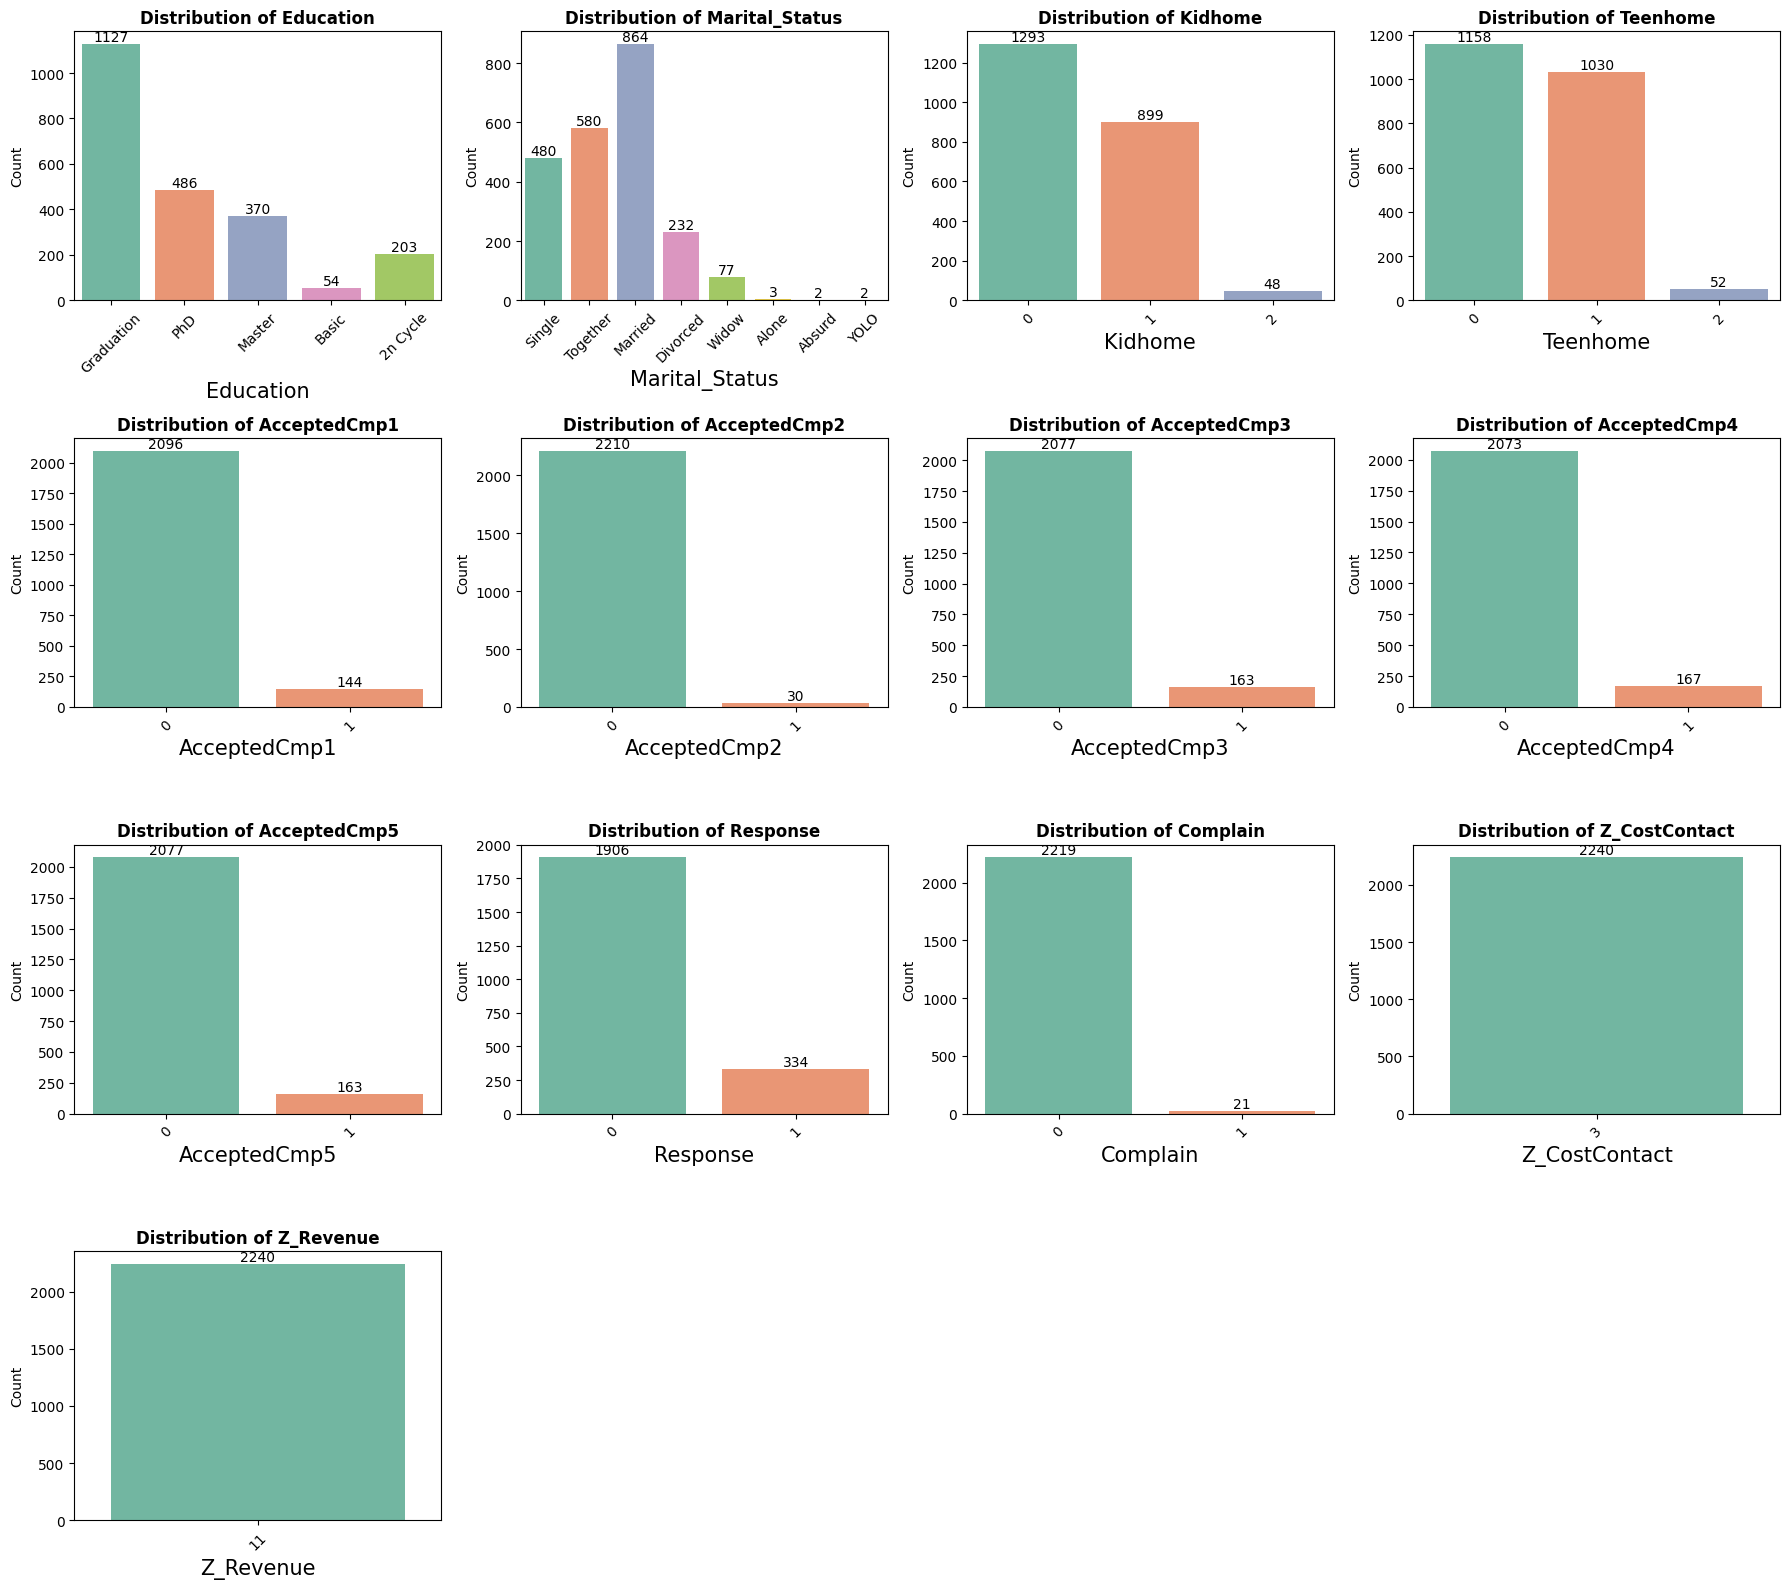

In [43]:
# Identifikasi kolom kategorikal
categorical_cols = ['Education', 'Marital_Status', 'Kidhome', 'Teenhome', 
                    'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
                    'Response', 'Complain', 'Z_CostContact', 'Z_Revenue']

# Buat figure dengan subplots
fig, axes = plt.subplots(4, 4, figsize=(18, 16))
axes = axes.flatten()

# Plot count untuk setiap fitur kategorikal
for idx, col in enumerate(categorical_cols):
    sns.countplot(data=df, x=col, ax=axes[idx], palette='Set2')
    axes[idx].set_title(f'Distribution of {col}', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel(col, fontsize=15)
    axes[idx].set_ylabel('Count', fontsize=10)
    axes[idx].tick_params(axis='x', rotation=45)
    
    # Tambahkan nilai di atas bar
    for container in axes[idx].containers:
        axes[idx].bar_label(container)

# Hapus subplot yang tidak terpakai
for idx in range(len(categorical_cols), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()

dari data diatas dapat kita peroleh informasi bahwa:
- Kelas pada fitur Education harus dibuat konsisten yakni dengan melakukan merge Master dan 2NCycle karena memiliki pengertian yang sama
- Kelas pada marital status untuk alone, absurd, dan YOLO dapat kita kelompokkan pada grup yang sama yakni other
- Untuk Education perlu kita lakukan label encoding
- Untuk Marital status perlu kita lakukan one hot encoding
- Untuk Z CostContact dan Z_Revenue tidak perlu kita gunakan karena nilainya sama untuk seluruh observasi dan tidak memiliki variasi

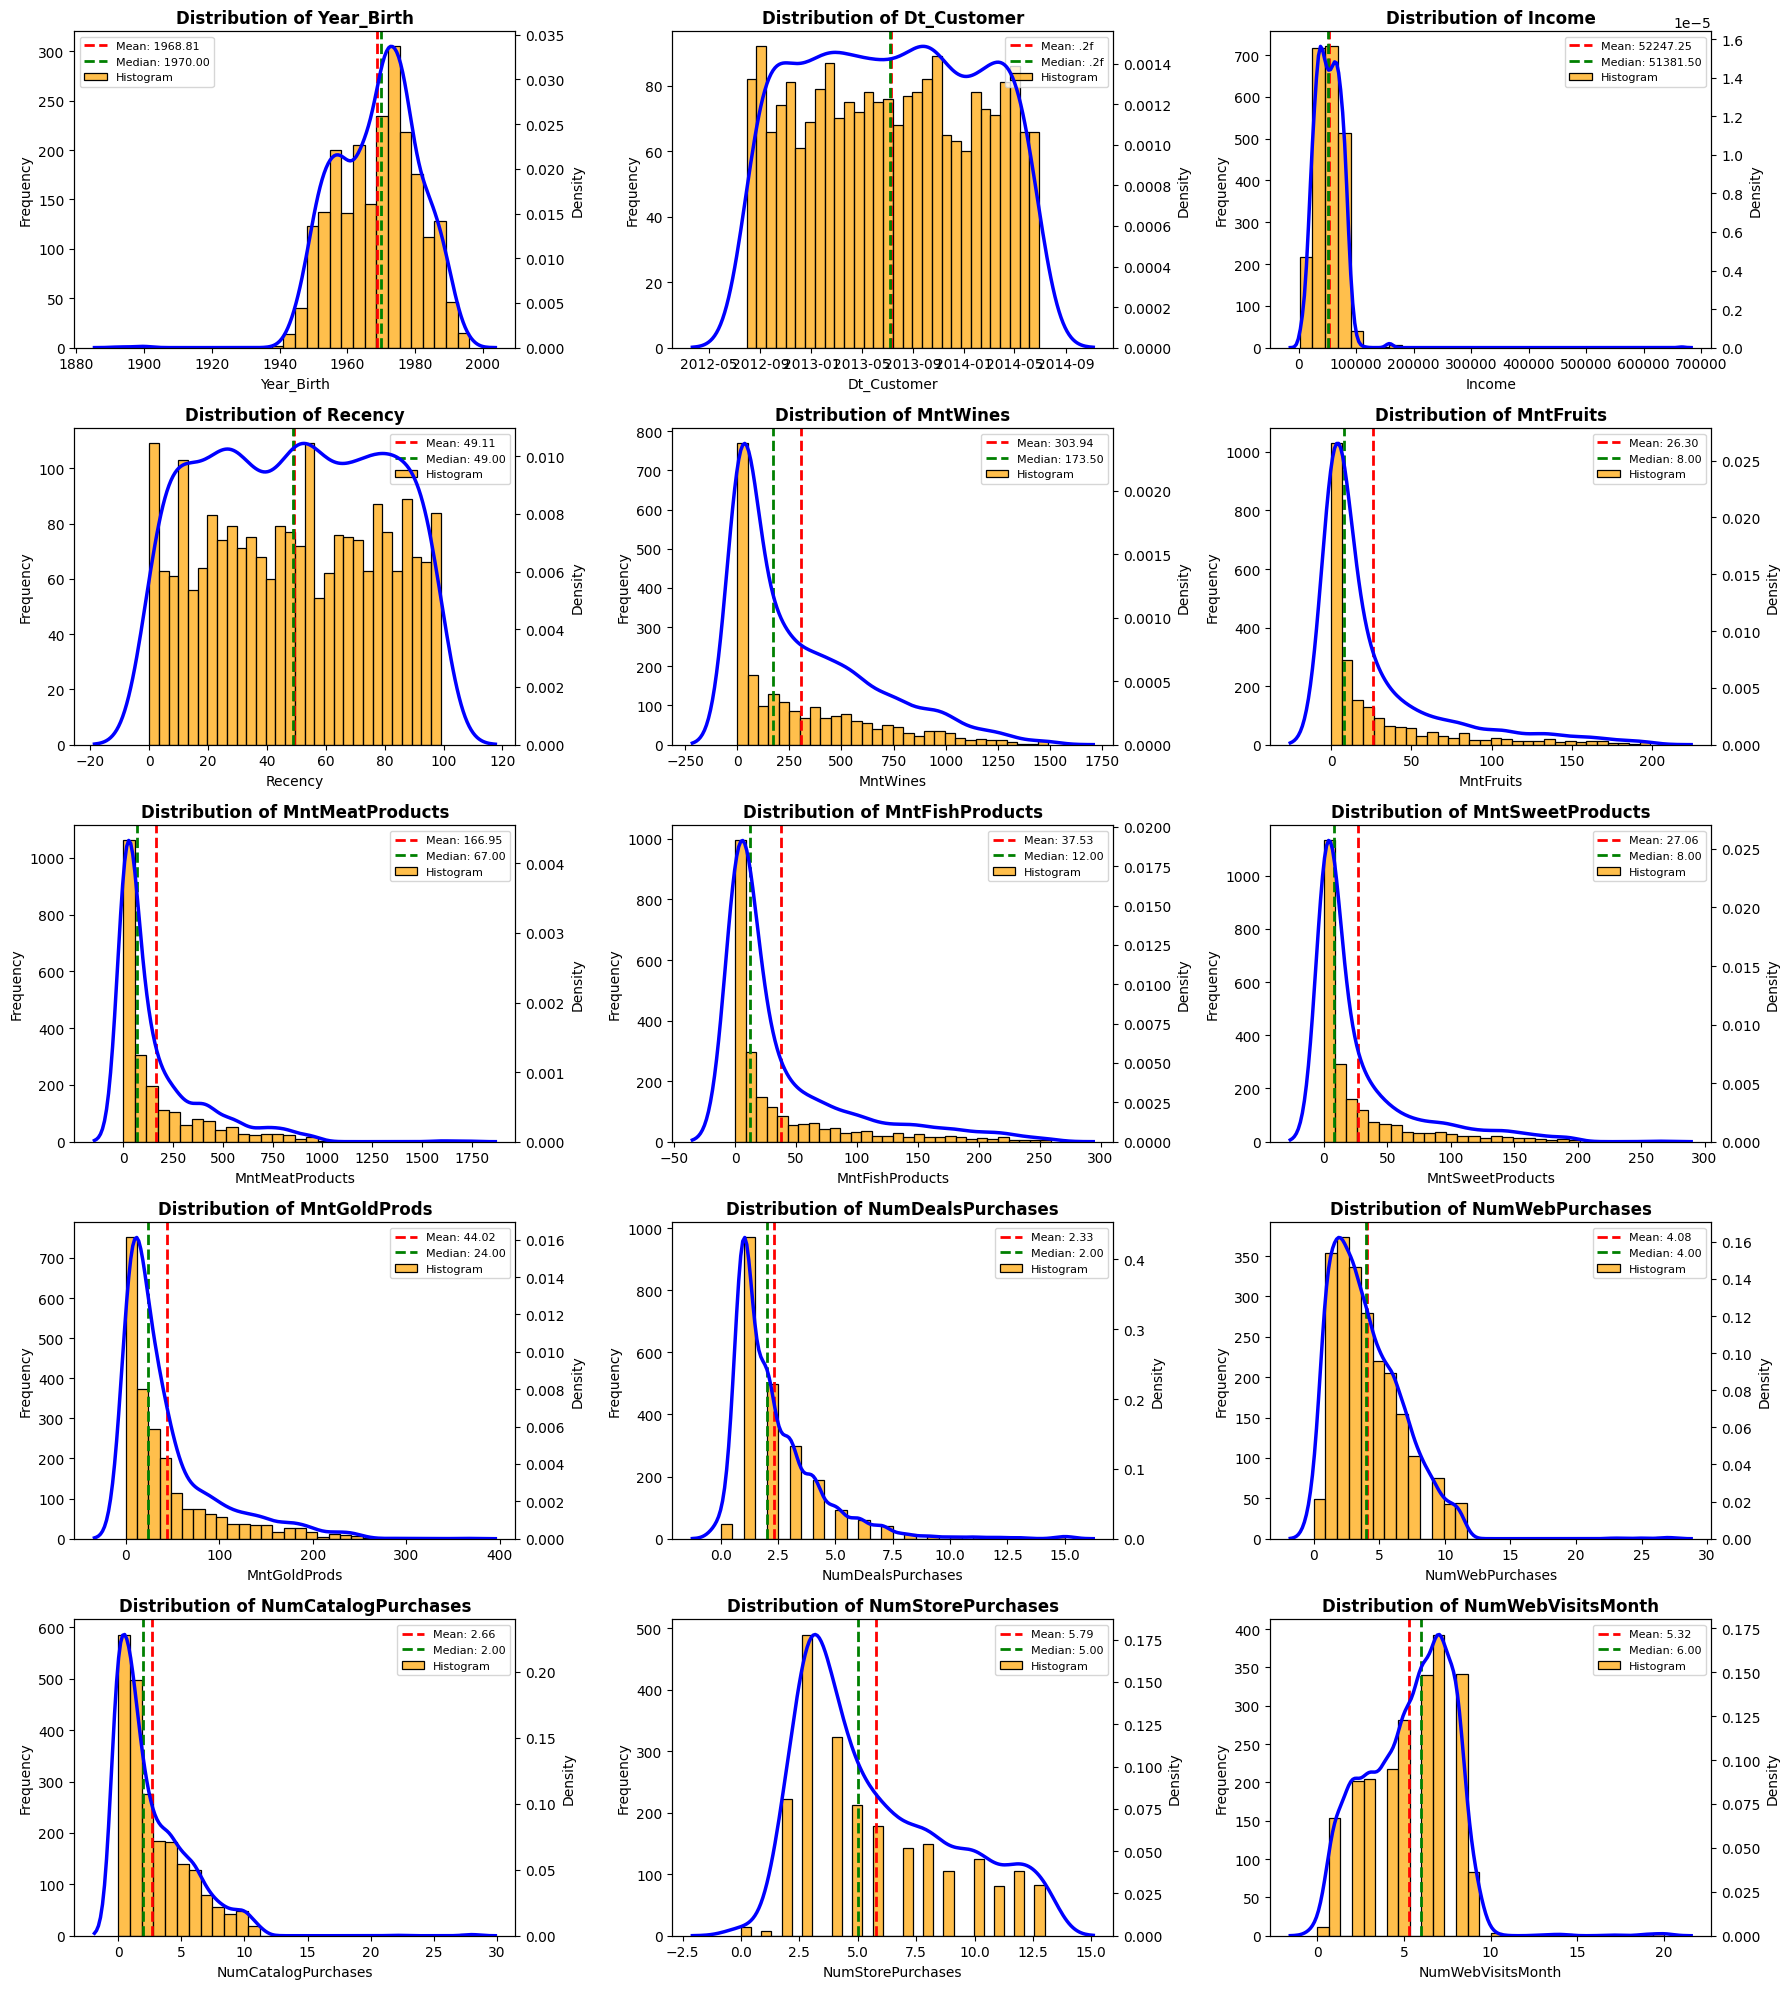

In [42]:
numerical_cols = ['Year_Birth', 'Dt_Customer', 'Income', 
                  'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 
                  'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 
                  'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']
# Buat figure dengan subplots
fig, axes = plt.subplots(5, 3, figsize=(18, 20))
axes = axes.flatten()

# Plot histogram + KDE untuk setiap fitur numerik (pakai seaborn)
for idx, col in enumerate(numerical_cols):
    sns.histplot(
        df[col].dropna(),
        bins=30, color='orange', kde=False, label='Histogram',
        edgecolor='black', alpha=0.7, ax=axes[idx]
    )

    ax2 = axes[idx].twinx()
    
    sns.kdeplot(
        df[col].dropna(),
        color='blue',  
        linewidth=2.5,
        label='KDE',
        ax=ax2
    )

    axes[idx].set_title(f'Distribution of {col}', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel(col, fontsize=10)
    axes[idx].set_ylabel('Frequency', fontsize=10)
    axes[idx].grid(False)

    # Tambahkan garis mean & median
    mean_val = df[col].mean()
    median_val = df[col].median()
    axes[idx].axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
    axes[idx].axvline(median_val, color='green', linestyle='--', linewidth=2, label=f'Median: {median_val:.2f}')
    axes[idx].legend(fontsize=8)

# Hapus subplot yang tidak terpakai
for idx in range(len(numerical_cols), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()

plt.show()

dari hasil diatas dapat kita peroleh informasi bahwa:
- Fitur Year_Birth akan lebih intuitif apabila ditransformasi menjadi usia
- FiturDt_Customer akan lebih bermakna apabila ditransformasi menjadi lamanya menjadi pelanggan
- Income sangat rightskewed sehingga perlu dilakukan transformasi log
- Seluruh fitur Mnt* sangat right skewed sehingga perlu dilakukan transformasi log
- Semua fitur perlu dilakukan scaling.

# Step 3: Identifikasi kolom numerik & kategori

Berdasarkan eksplorasi awal diatas dapat diperoleh informasi bahwa kolom numerik dan kategori adalah sebagai berikut:
Fitur kategorikal (11) : Education, Marital_Status, Kidhome, Teenhome, AcceptedCmp1, AcceptedCmp2, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, Response, Complain

Fitur Numerikal (15): Year_Birth, Dt_Customer, Income, Recency, MntWines, MntFruits,MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth

Tidak digunakan (3): ID, Z_CostContact, Z_Revenue

Namun karena Kidhome, Teenhome, AcceptedCmp1, AcceptedCmp2, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, Response, Complain sudah diberi label maka saya masukkan kolom numerik

In [78]:
numerik=df[['Year_Birth', 'Dt_Customer', 'Income', 
            'Recency', 'MntWines', 'MntFruits','MntMeatProducts', 
            'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 
            'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 
            'NumStorePurchases', 'NumWebVisitsMonth', 'Kidhome', 
            'Teenhome', 'AcceptedCmp1', 'AcceptedCmp2', 
            'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 
            'Response', 'Complain']]
kategorikal=df[['Education', 'Marital_Status']]
tidak_dipakai=df[['ID', 'Z_CostContact', 'Z_Revenue']]


## Preprocessing fitur numerik

### Transformasi Year_Birth menjadi age asumsi Tahun analisis adalah Tahun 2025

In [79]:
numerik['age'] = 2025 - numerik['Year_Birth']
#numerik=numerik.drop(columns=['Year_Birth'])

### Transformasi Dt_Customer menjadi Lama Pelanggan (Customer_Tenure) asumsi tanggal analisis adalah tanggal 30/11/2025

In [80]:
numerik['Customer_Tenure'] = (pd.to_datetime('2025-11-30') - pd.to_datetime(numerik['Dt_Customer'])).dt.days // 365
#numerik=numerik.drop(columns=['Dt_Customer'])

In [81]:
numerik.head()

,Year_Birth,Dt_Customer,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Teenhome,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,Complain,age,Customer_Tenure
0,1957,2012-09-04,58138.0,58,635,88,546,172,88,88,...,0,0,0,0,0,0,1,0,68,13
1,1954,2014-03-08,46344.0,38,11,1,6,2,1,6,...,1,0,0,0,0,0,0,0,71,11
2,1965,2013-08-21,71613.0,26,426,49,127,111,21,42,...,0,0,0,0,0,0,0,0,60,12
3,1984,2014-02-10,26646.0,26,11,4,20,10,3,5,...,0,0,0,0,0,0,0,0,41,11
4,1981,2014-01-19,58293.0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,0,0,44,11


### Transformasi log untuk income dan Mnt (Belanja)

In [82]:
numerik['Income']=np.log1p(numerik['Income'])

#numerik=numerik.drop(columns=['Income'])

In [83]:
for cols in ['MntWines', 'MntFruits','MntMeatProducts', 
            'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']:
        numerik[cols]=np.log1p(numerik[cols])

setelah dilakukan transformasi log distribusi dari income dan Mnt adalah sebagai berikut

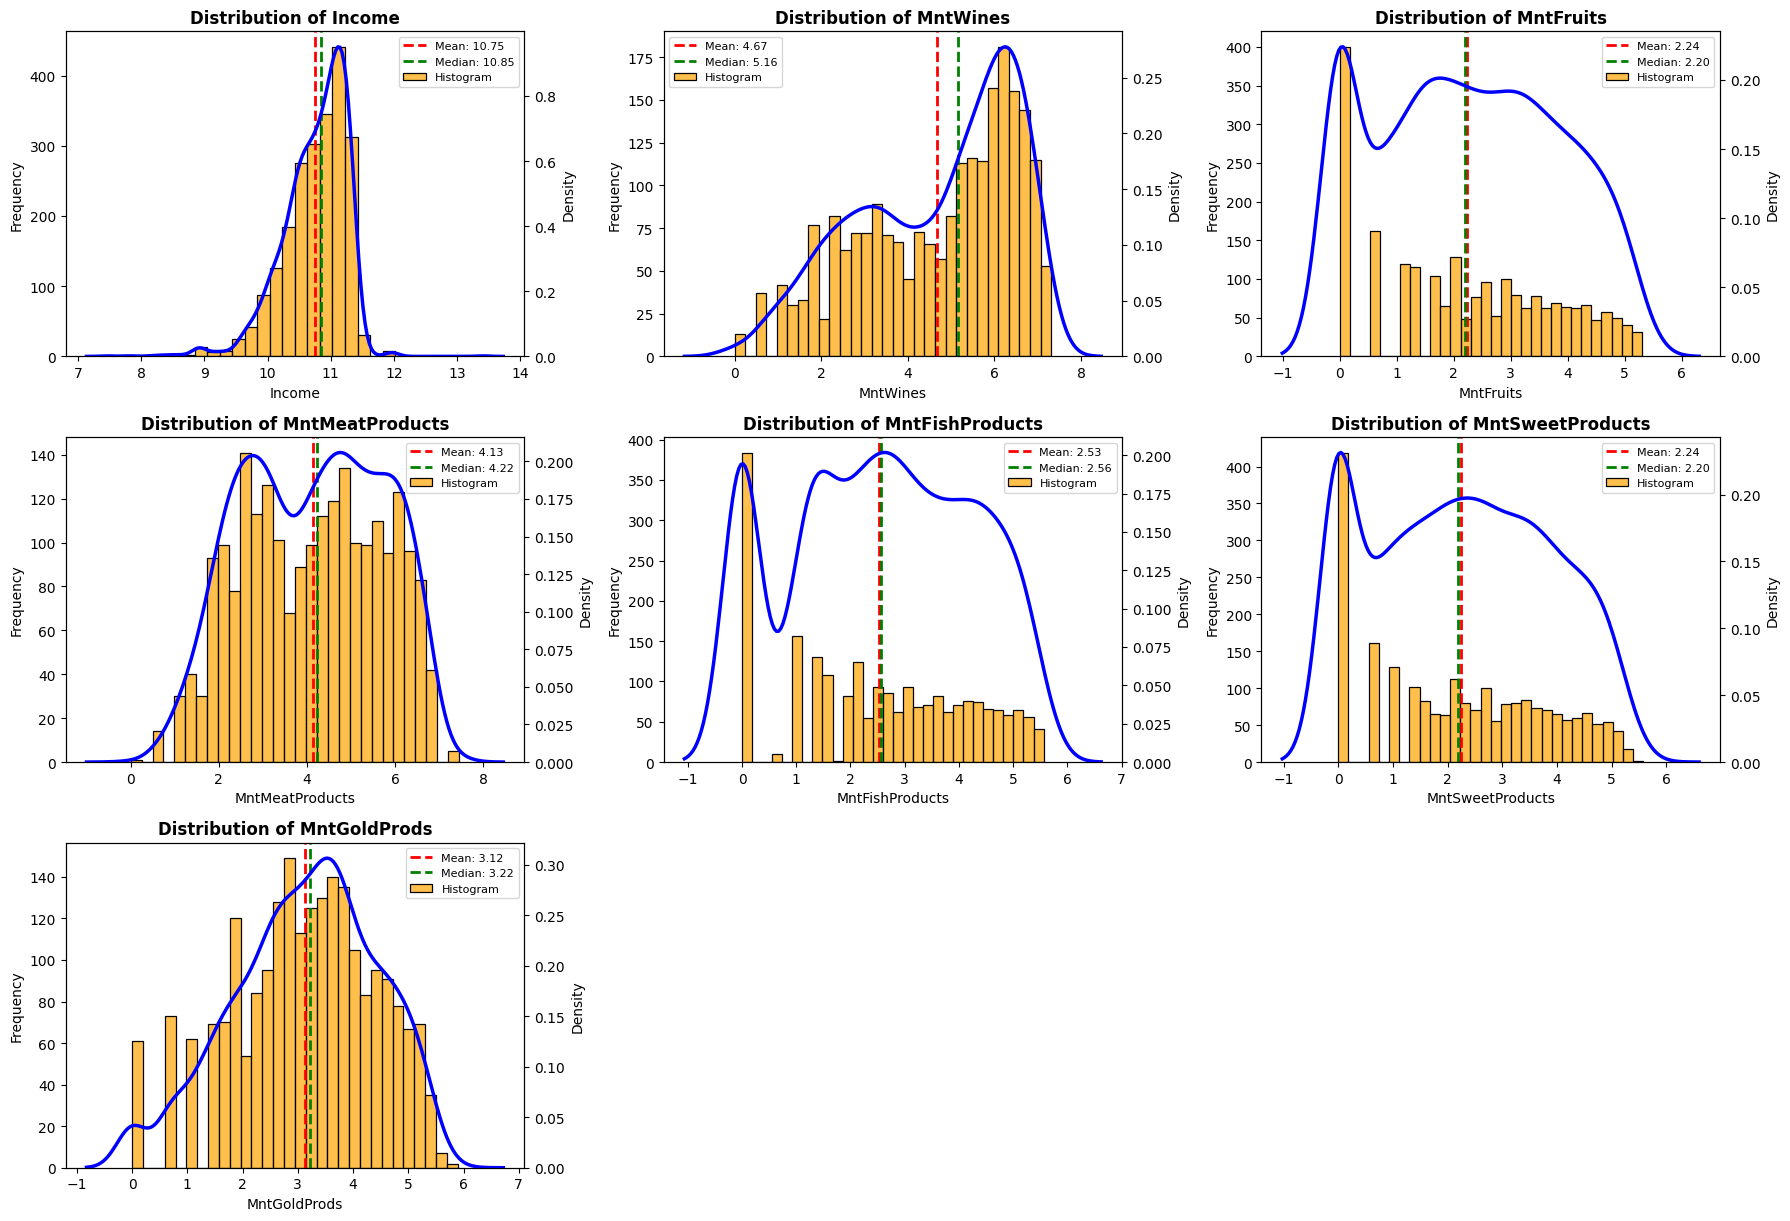

In [84]:
numerical_cols = ['Income', 
                  'MntWines', 'MntFruits', 'MntMeatProducts', 
                  'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
# Buat figure dengan subplots
fig, axes = plt.subplots(5, 3, figsize=(18, 20))
axes = axes.flatten()

# Plot histogram + KDE untuk setiap fitur numerik (pakai seaborn)
for idx, col in enumerate(numerical_cols):
    sns.histplot(
        numerik[col].dropna(),
        bins=30, color='orange', kde=False, label='Histogram',
        edgecolor='black', alpha=0.7, ax=axes[idx]
    )

    ax2 = axes[idx].twinx()
    
    sns.kdeplot(
        numerik[col].dropna(),
        color='blue',  
        linewidth=2.5,
        label='KDE',
        ax=ax2
    )

    axes[idx].set_title(f'Distribution of {col}', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel(col, fontsize=10)
    axes[idx].set_ylabel('Frequency', fontsize=10)
    axes[idx].grid(False)

    # Tambahkan garis mean & median
    mean_val = numerik[col].mean()
    median_val = numerik[col].median()
    axes[idx].axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
    axes[idx].axvline(median_val, color='green', linestyle='--', linewidth=2, label=f'Median: {median_val:.2f}')
    axes[idx].legend(fontsize=8)

# Hapus subplot yang tidak terpakai
for idx in range(len(numerical_cols), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()

plt.show()

## Preprocessing fitur kategori (Selain labelling, karena labelling akan dilakukan di Step 5)

### Gabungkan Fitur Education dan Marital status yang memiliki kesamaan

In [85]:
kategorikal['Marital_Status'].value_counts()

Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [86]:
kategorikal['Education']=kategorikal['Education'].replace({'Basic':'Undergraduate', 'Graduation':'Bachelor' ,'2n Cycle':'Master'})
kategorikal['Marital_Status']=kategorikal['Marital_Status'].replace({'Alone':'Single','Absurd':'Single', 'YOLO':'Single',
                                                                      'Divorced':'Single', 'Widow':'Single', 'Together':'Married'})

In [87]:
kategorikal['Education'].value_counts()

Education
Bachelor         1127
Master            573
PhD               486
Undergraduate      54
Name: count, dtype: int64

In [88]:
kategorikal['Marital_Status'].value_counts()

Marital_Status
Married    1444
Single      796
Name: count, dtype: int64

# Step 4: Imputasi missing value

In [89]:
numerik['Income'].fillna(numerik['Income'].median(), inplace=True)

In [90]:
numerik.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Year_Birth           2240 non-null   int64         
 1   Dt_Customer          2240 non-null   datetime64[ns]
 2   Income               2240 non-null   float64       
 3   Recency              2240 non-null   int64         
 4   MntWines             2240 non-null   float64       
 5   MntFruits            2240 non-null   float64       
 6   MntMeatProducts      2240 non-null   float64       
 7   MntFishProducts      2240 non-null   float64       
 8   MntSweetProducts     2240 non-null   float64       
 9   MntGoldProds         2240 non-null   float64       
 10  NumDealsPurchases    2240 non-null   int64         
 11  NumWebPurchases      2240 non-null   int64         
 12  NumCatalogPurchases  2240 non-null   int64         
 13  NumStorePurchases    2240 non-nul

In [91]:
# Deteksi missing value
missing = numerik.isna().sum()
percent = (numerik.isna().mean() * 100).round(2)
missing_df = pd.concat([missing, percent], axis=1)
missing_df.columns = ['missing_count', 'missing_percent']
missing_df = missing_df.sort_values('missing_count', ascending=False)
missing_df

,missing_count,missing_percent
Year_Birth,0,0.0
Dt_Customer,0,0.0
age,0,0.0
Complain,0,0.0
Response,0,0.0
AcceptedCmp5,0,0.0
AcceptedCmp4,0,0.0
AcceptedCmp3,0,0.0
AcceptedCmp2,0,0.0
AcceptedCmp1,0,0.0



# Step 5: Encoding fitur kategori

## Label Encoding

In [93]:
kategorikal['Education']=kategorikal['Education'].replace({'Undergraduate':0,
                                                        'Bachelor':1, 'Master':2,
                                                        'PhD':3})

## One-hot encoding

In [94]:
cat_vars = ['Marital_Status']
for var in cat_vars:
    cat_list = pd.get_dummies(kategorikal[var], prefix=var)
    data = kategorikal.join(cat_list)
    kategorikal = data

# remove categorical data
data_vars = kategorikal.columns.values.tolist()
to_keep = [i for i in data_vars if i not in cat_vars] # filter process
kategorikal = kategorikal[to_keep]

In [97]:
kategorikal.head()

,Education,Marital_Status_Married,Marital_Status_Single
0,1,False,True
1,1,False,True
2,1,True,False
3,1,True,False
4,3,True,False


#Gabungkan data numerik & hasil encoding

In [99]:
df_gabung = pd.concat([numerik, kategorikal], axis=1)

In [100]:
df_gabung.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Year_Birth              2240 non-null   int64         
 1   Dt_Customer             2240 non-null   datetime64[ns]
 2   Income                  2240 non-null   float64       
 3   Recency                 2240 non-null   int64         
 4   MntWines                2240 non-null   float64       
 5   MntFruits               2240 non-null   float64       
 6   MntMeatProducts         2240 non-null   float64       
 7   MntFishProducts         2240 non-null   float64       
 8   MntSweetProducts        2240 non-null   float64       
 9   MntGoldProds            2240 non-null   float64       
 10  NumDealsPurchases       2240 non-null   int64         
 11  NumWebPurchases         2240 non-null   int64         
 12  NumCatalogPurchases     2240 non-null   int64   

kita hapus kolom year_birth dan dt_customer karena sudah diganti age dan tenure

In [101]:
df_run=df_gabung.drop(['Year_Birth', 'Dt_Customer'], axis=1)

In [102]:
df_run.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Income                  2240 non-null   float64
 1   Recency                 2240 non-null   int64  
 2   MntWines                2240 non-null   float64
 3   MntFruits               2240 non-null   float64
 4   MntMeatProducts         2240 non-null   float64
 5   MntFishProducts         2240 non-null   float64
 6   MntSweetProducts        2240 non-null   float64
 7   MntGoldProds            2240 non-null   float64
 8   NumDealsPurchases       2240 non-null   int64  
 9   NumWebPurchases         2240 non-null   int64  
 10  NumCatalogPurchases     2240 non-null   int64  
 11  NumStorePurchases       2240 non-null   int64  
 12  NumWebVisitsMonth       2240 non-null   int64  
 13  Kidhome                 2240 non-null   int64  
 14  Teenhome                2240 non-null   

# Step 6: Scaling data

In [103]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_run)
df_scaled = pd.DataFrame(df_scaled, columns=df_run.columns)

In [104]:
df_scaled

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,Complain,age,Customer_Tenure,Education,Marital_Status_Married,Marital_Status_Single
0,0.428874,0.307039,0.987816,1.432838,1.395245,1.580292,1.411082,1.061778,0.349414,1.409304,...,-0.28014,-0.283830,-0.28014,2.388846,-0.097282,0.985345,1.611401,-0.792910,-1.346874,1.346874
1,-0.021774,-0.383664,-1.213337,-0.984548,-1.397218,-0.866776,-0.970316,-0.912490,-0.168236,-1.110409,...,-0.28014,-0.283830,-0.28014,-0.418612,-0.097282,1.235733,-1.324377,-0.792910,-1.346874,1.346874
2,0.843209,-0.798086,0.766933,1.065587,0.464698,1.317887,0.534192,0.496970,-0.685887,1.409304,...,-0.28014,-0.283830,-0.28014,-0.418612,-0.097282,0.317643,0.143512,-0.792910,0.742460,-0.742460
3,-1.121817,-0.798086,-1.213337,-0.400953,-0.693351,-0.082637,-0.535416,-1.032178,-0.168236,-0.750450,...,-0.28014,-0.283830,-0.28014,-0.418612,-0.097282,-1.268149,-1.324377,-0.792910,0.742460,-0.742460
4,0.434166,1.550305,0.269227,0.984169,0.417988,0.793822,0.685504,-0.270625,1.384715,0.329427,...,-0.28014,-0.283830,-0.28014,-0.418612,-0.097282,-1.017761,-1.324377,1.589543,0.742460,-0.742460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,0.531641,-0.107383,1.048838,0.984169,0.693716,0.740141,1.593342,1.857466,-0.168236,1.769263,...,-0.28014,-0.283830,-0.28014,-0.418612,-0.097282,0.150717,0.143512,-0.792910,0.742460,-0.742460
2236,0.620247,0.237969,0.740337,-1.426020,-0.443825,-1.529807,-1.405216,-0.717360,2.420015,1.409304,...,-0.28014,-0.283830,-0.28014,-0.418612,-0.097282,1.903435,-1.324377,1.589543,0.742460,-0.742460
2237,0.388920,1.446700,1.185820,1.052720,0.805842,0.580395,0.204106,0.075889,-0.685887,-0.750450,...,-0.28014,3.523233,-0.28014,-0.418612,-0.097282,-1.017761,-1.324377,-0.792910,-1.346874,1.346874
2238,0.776374,-1.419719,0.769523,0.761121,0.796964,1.122318,0.749365,0.781095,-0.168236,0.689386,...,-0.28014,-0.283830,-0.28014,-0.418612,-0.097282,1.068807,-1.324377,0.398316,0.742460,-0.742460



# Step 7: Tentukan jumlah cluster optimal (Elbow + Silhouette)

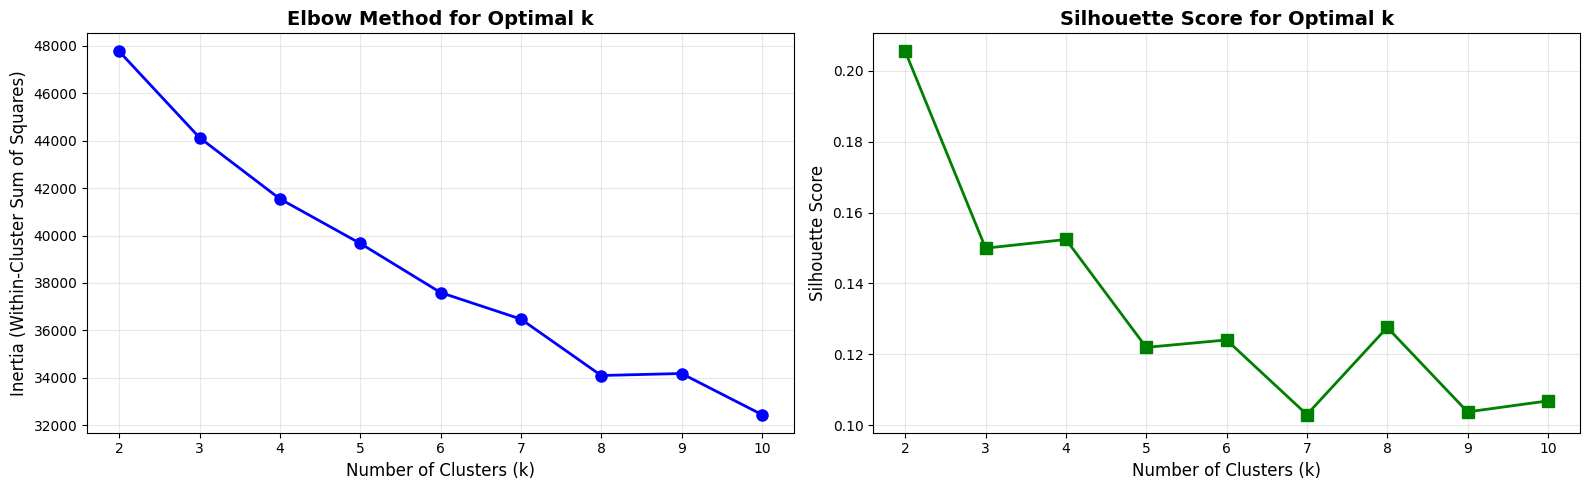


=== Hasil Evaluasi Cluster ===
 Number of Clusters      Inertia  Silhouette Score
                  2 47765.396429          0.205399
                  3 44128.067022          0.149952
                  4 41547.664340          0.152398
                  5 39668.862018          0.121983
                  6 37595.840412          0.124076
                  7 36475.801551          0.103039
                  8 34096.217398          0.127605
                  9 34180.831248          0.103790
                 10 32448.391179          0.106892


In [105]:
# Tentukan range jumlah cluster yang akan diuji
k_range = range(2, 11)

# Inisialisasi list untuk menyimpan hasil
inertias = []
silhouette_scores = []

# Hitung inertia dan silhouette score untuk setiap k
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df_scaled, kmeans.labels_))

# Visualisasi Elbow Method dan Silhouette Score
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Plot Elbow Method
axes[0].plot(k_range, inertias, marker='o', linewidth=2, markersize=8, color='blue')
axes[0].set_xlabel('Number of Clusters (k)', fontsize=12)
axes[0].set_ylabel('Inertia (Within-Cluster Sum of Squares)', fontsize=12)
axes[0].set_title('Elbow Method for Optimal k', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# Plot Silhouette Score
axes[1].plot(k_range, silhouette_scores, marker='s', linewidth=2, markersize=8, color='green')
axes[1].set_xlabel('Number of Clusters (k)', fontsize=12)
axes[1].set_ylabel('Silhouette Score', fontsize=12)
axes[1].set_title('Silhouette Score for Optimal k', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Tampilkan hasil dalam bentuk tabel
result_df = pd.DataFrame({
    'Number of Clusters': list(k_range),
    'Inertia': inertias,
    'Silhouette Score': silhouette_scores
})
print("\n=== Hasil Evaluasi Cluster ===")
print(result_df.to_string(index=False))

## Penentuan Jumlah Cluster Optimal (KMeans)

Penentuan jumlah cluster optimal dilakukan menggunakan dua metode evaluasi, yaitu **Elbow Method** dan **Silhouette Score**.

---

### 1. Hasil Evaluasi Silhouette Score

Berdasarkan grafik Silhouette Score:

- Nilai **tertinggi** diperoleh pada:
  - **k = 2** dengan Silhouette Score ≈ **0.205**
- Nilai lain yang relatif cukup baik:
  - k = 4 → ≈ 0.152  
  - k = 8 → ≈ 0.127  

Artinya, secara **kualitas pemisahan cluster murni**, nilai **k = 2** memberikan hasil paling optimal secara matematis.

---

### 2. Hasil Evaluasi Elbow Method

Berdasarkan grafik Elbow Method (Inertia):

- Penurunan inertia **sangat tajam** dari k = 2 hingga k = 4
- Setelah **k = 4–5**, penurunan inertia mulai **melandai**
- Setelah k ≥ 6, penurunan semakin kecil (diminishing return)

Ini menunjukkan bahwa **titik elbow berada di sekitar k = 4 atau k = 5**.

---

### 3. Keputusan Jumlah Cluster Optimal

Dengan menggabungkan kedua metode:

| Tujuan Analisis | Jumlah Cluster (k) |
|------------------|--------------------|
| Pemisahan cluster terbaik secara matematis | **k = 2** |
| Segmentasi pelanggan yang lebih kaya & mudah diinterpretasi | **k = 4** |

### Keputusan akhir
- Titik elbow sudah terbentuk pada k = 4
- Nilai Silhouette masih tergolong cukup baik

# Step 8: Pilih k optimal dan klasterisasi

In [106]:
optimal_k = 4
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
clusters = kmeans_final.fit_predict(df_scaled)

# Tambahkan label cluster ke dataframe
df_run['Cluster'] = clusters
df['Cluster'] = clusters

print(f"Klasterisasi selesai dengan k = {optimal_k}")
print(f"\nDistribusi Cluster:")
print(df_run['Cluster'].value_counts().sort_index())
print(f"\nSilhouette Score: {silhouette_score(df_scaled, clusters):.4f}")

Klasterisasi selesai dengan k = 4

Distribusi Cluster:
Cluster
0    881
1    630
2    510
3    219
Name: count, dtype: int64

Silhouette Score: 0.1524


# Step 9: Visualisasi klaster dengan PCA 2D

- Analisis ciri khas tiap klaster (profiling pelanggan).
- Visualisasi klaster dengan scatterplot 2D atau PCA 2D/3D.

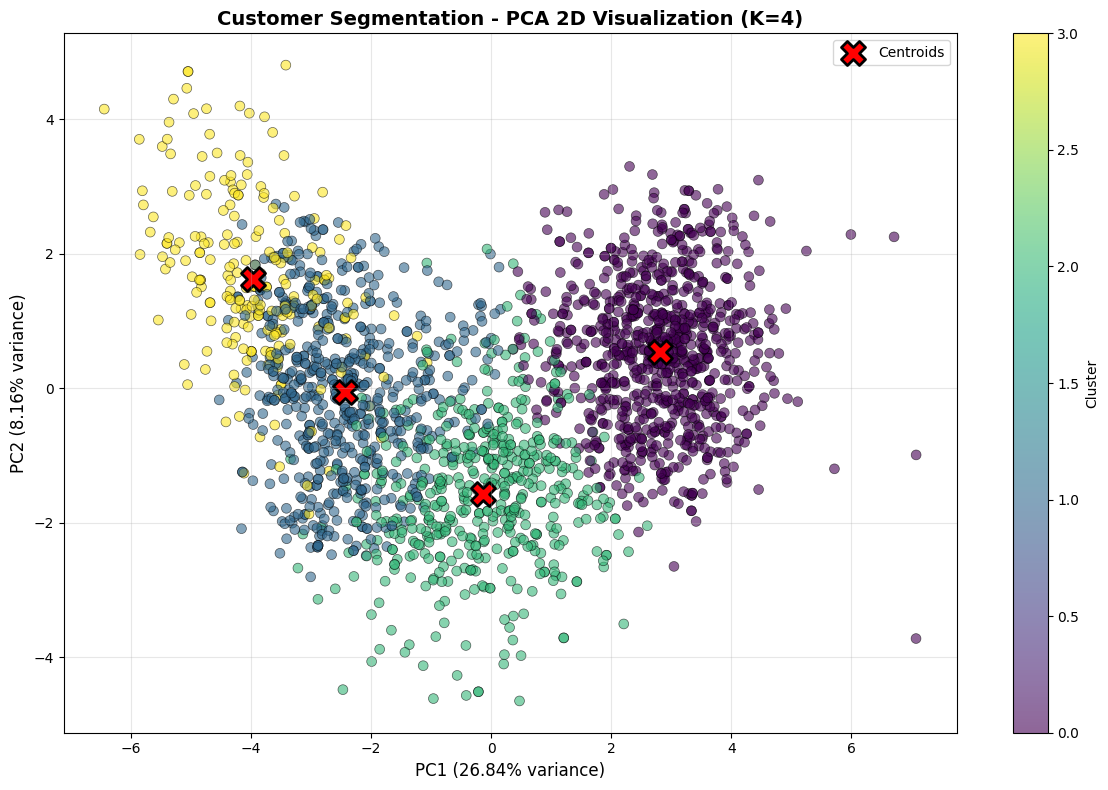


Total variance explained by 2 components: 35.00%


In [107]:
# Reduksi dimensi dengan PCA menjadi 2 komponen
pca = PCA(n_components=2, random_state=42)
df_pca = pca.fit_transform(df_scaled)

# Buat DataFrame untuk hasil PCA
df_pca_plot = pd.DataFrame(df_pca, columns=['PC1', 'PC2'])
df_pca_plot['Cluster'] = clusters

# Visualisasi scatter plot 2D
plt.figure(figsize=(12, 8))
scatter = plt.scatter(df_pca_plot['PC1'], df_pca_plot['PC2'], 
                     c=df_pca_plot['Cluster'], 
                     cmap='viridis', 
                     s=50, 
                     alpha=0.6, 
                     edgecolors='k', 
                     linewidth=0.5)

# Tambahkan centroid
centroids_pca = pca.transform(kmeans_final.cluster_centers_)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], 
           c='red', 
           marker='X', 
           s=300, 
           edgecolors='black', 
           linewidth=2, 
           label='Centroids')

plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.2f}% variance)', fontsize=12)
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.2f}% variance)', fontsize=12)
plt.title('Customer Segmentation - PCA 2D Visualization (K=4)', fontsize=14, fontweight='bold')
plt.colorbar(scatter, label='Cluster')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\nTotal variance explained by 2 components: {pca.explained_variance_ratio_.sum()*100:.2f}%")

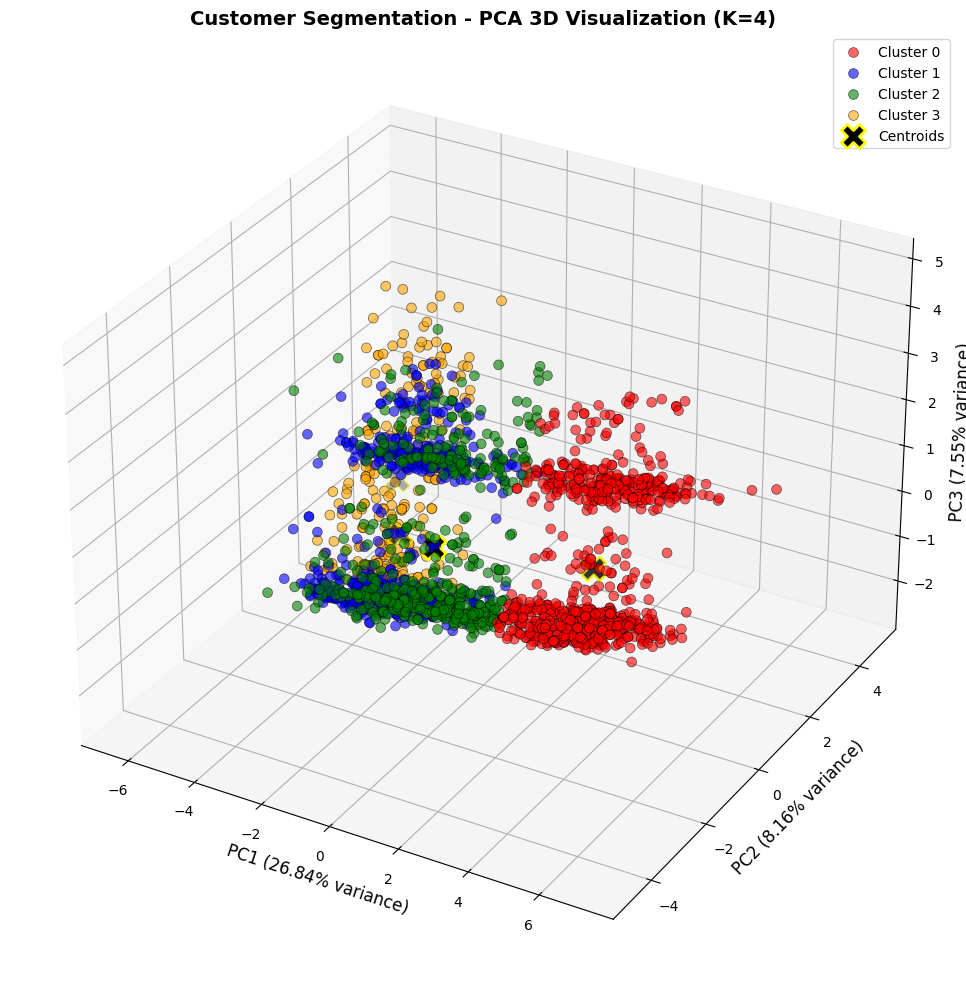


Total variance explained by 3 components: 42.55%


In [108]:
# Reduksi dimensi dengan PCA menjadi 3 komponen
pca_3d = PCA(n_components=3, random_state=42)
df_pca_3d = pca_3d.fit_transform(df_scaled)

# Buat DataFrame untuk hasil PCA 3D
df_pca_3d_plot = pd.DataFrame(df_pca_3d, columns=['PC1', 'PC2', 'PC3'])
df_pca_3d_plot['Cluster'] = clusters

# Visualisasi scatter plot 3D
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot untuk setiap cluster dengan warna berbeda
colors = ['red', 'blue', 'green', 'orange']
for i in range(optimal_k):
    cluster_data = df_pca_3d_plot[df_pca_3d_plot['Cluster'] == i]
    ax.scatter(cluster_data['PC1'], cluster_data['PC2'], cluster_data['PC3'], 
               c=colors[i], label=f'Cluster {i}', s=50, alpha=0.6, edgecolors='k', linewidth=0.5)

# Tambahkan centroid
centroids_pca_3d = pca_3d.transform(kmeans_final.cluster_centers_)
ax.scatter(centroids_pca_3d[:, 0], centroids_pca_3d[:, 1], centroids_pca_3d[:, 2],
           c='black', marker='X', s=300, edgecolors='yellow', linewidth=2, label='Centroids')

ax.set_xlabel(f'PC1 ({pca_3d.explained_variance_ratio_[0]*100:.2f}% variance)', fontsize=12)
ax.set_ylabel(f'PC2 ({pca_3d.explained_variance_ratio_[1]*100:.2f}% variance)', fontsize=12)
ax.set_zlabel(f'PC3 ({pca_3d.explained_variance_ratio_[2]*100:.2f}% variance)', fontsize=12)
ax.set_title('Customer Segmentation - PCA 3D Visualization (K=4)', fontsize=14, fontweight='bold')
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nTotal variance explained by 3 components: {pca_3d.explained_variance_ratio_.sum()*100:.2f}%")

# Step 10: Profiling cluster (rata-rata fitur per cluster)

In [111]:
df_run.columns

Index(['Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'Kidhome', 'Teenhome',
       'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4',
       'AcceptedCmp5', 'Response', 'Complain', 'age', 'Customer_Tenure',
       'Education', 'Marital_Status_Married', 'Marital_Status_Single',
       'Cluster'],
      dtype='object')

PROFIL CLUSTER - RATA-RATA FITUR PER CLUSTER
         Count  Income  Recency  MntWines  MntFruits  MntMeatProducts  \
Cluster                                                                 
0          881   10.32    48.67      2.76       1.13             2.56   
1          630   11.11    50.00      5.92       3.68             5.53   
2          510   10.84    48.61      5.61       1.81             4.29   
3          219   11.29    49.47      6.59       3.57             5.98   

         MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
Cluster                                                                       
0                   1.38              1.15          2.14               1.88   
1                   4.06              3.62          3.87               1.86   
2                   2.03              1.79          3.53               4.20   
3                   4.00              3.74          3.96               1.07   

         ...  AcceptedCmp3  AcceptedCmp4 

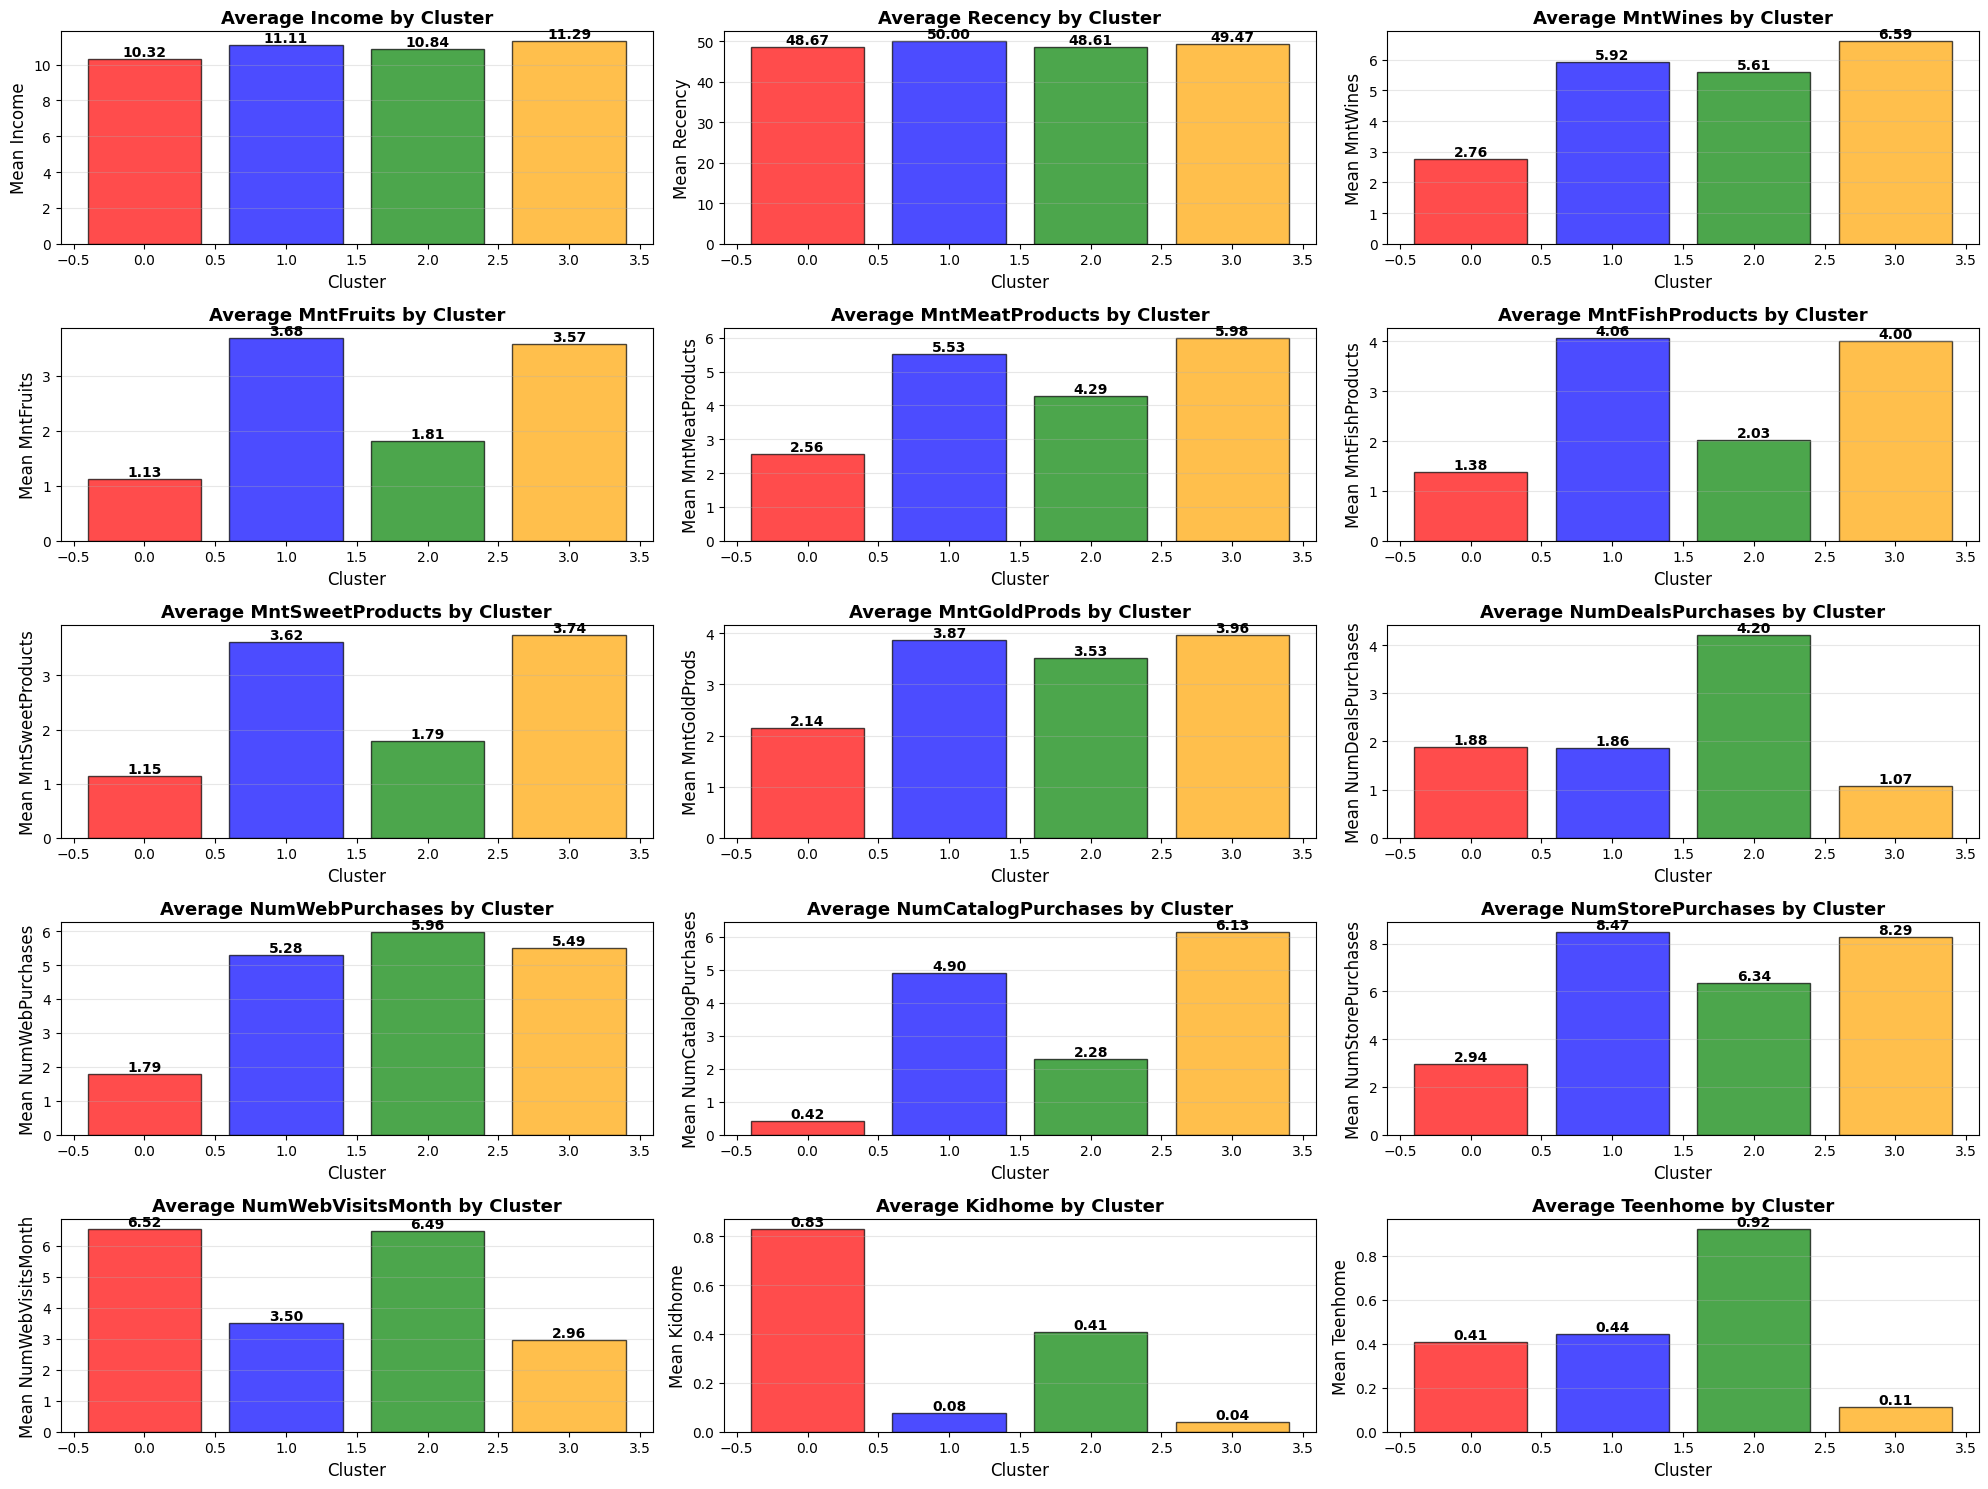


DISTRIBUSI CLUSTER
         Jumlah  Persentase (%)
Cluster                        
0           881           39.33
1           630           28.12
2           510           22.77
3           219            9.78


In [115]:
# Profiling cluster - rata-rata fitur per cluster
cluster_profile = df_run.groupby('Cluster').mean()

# Tambahkan jumlah anggota per cluster
cluster_profile['Count'] = df_run.groupby('Cluster').size()

# Urutkan kolom agar Count di depan
cols = ['Count'] + [col for col in cluster_profile.columns if col != 'Count']
cluster_profile = cluster_profile[cols]

# Tampilkan profil cluster
print("="*80)
print("PROFIL CLUSTER - RATA-RATA FITUR PER CLUSTER")
print("="*80)
print(cluster_profile.round(2))

# Visualisasi profil cluster untuk fitur-fitur penting
fig, axes = plt.subplots(5, 3, figsize=(20, 15))
axes = axes.flatten()

# Pilih beberapa fitur penting untuk divisualisasikan
important_features = ['Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'Kidhome', 'Teenhome',
       ]

for idx, feature in enumerate(important_features):
    cluster_means = df_run.groupby('Cluster')[feature].mean()
    axes[idx].bar(cluster_means.index, cluster_means.values, 
                  color=['red', 'blue', 'green', 'orange'], 
                  edgecolor='black', alpha=0.7)
    axes[idx].set_xlabel('Cluster', fontsize=12)
    axes[idx].set_ylabel(f'Mean {feature}', fontsize=12)
    axes[idx].set_title(f'Average {feature} by Cluster', fontsize=13, fontweight='bold')
    axes[idx].grid(True, alpha=0.3, axis='y')
    
    # Tambahkan nilai di atas bar
    for i, v in enumerate(cluster_means.values):
        axes[idx].text(i, v, f'{v:.2f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

# Hitung persentase distribusi cluster
print("\n" + "="*80)
print("DISTRIBUSI CLUSTER")
print("="*80)
cluster_distribution = df_run['Cluster'].value_counts().sort_index()
cluster_percentage = (cluster_distribution / len(df_run) * 100).round(2)
distribution_df = pd.DataFrame({
    'Jumlah': cluster_distribution,
    'Persentase (%)': cluster_percentage
})
print(distribution_df)

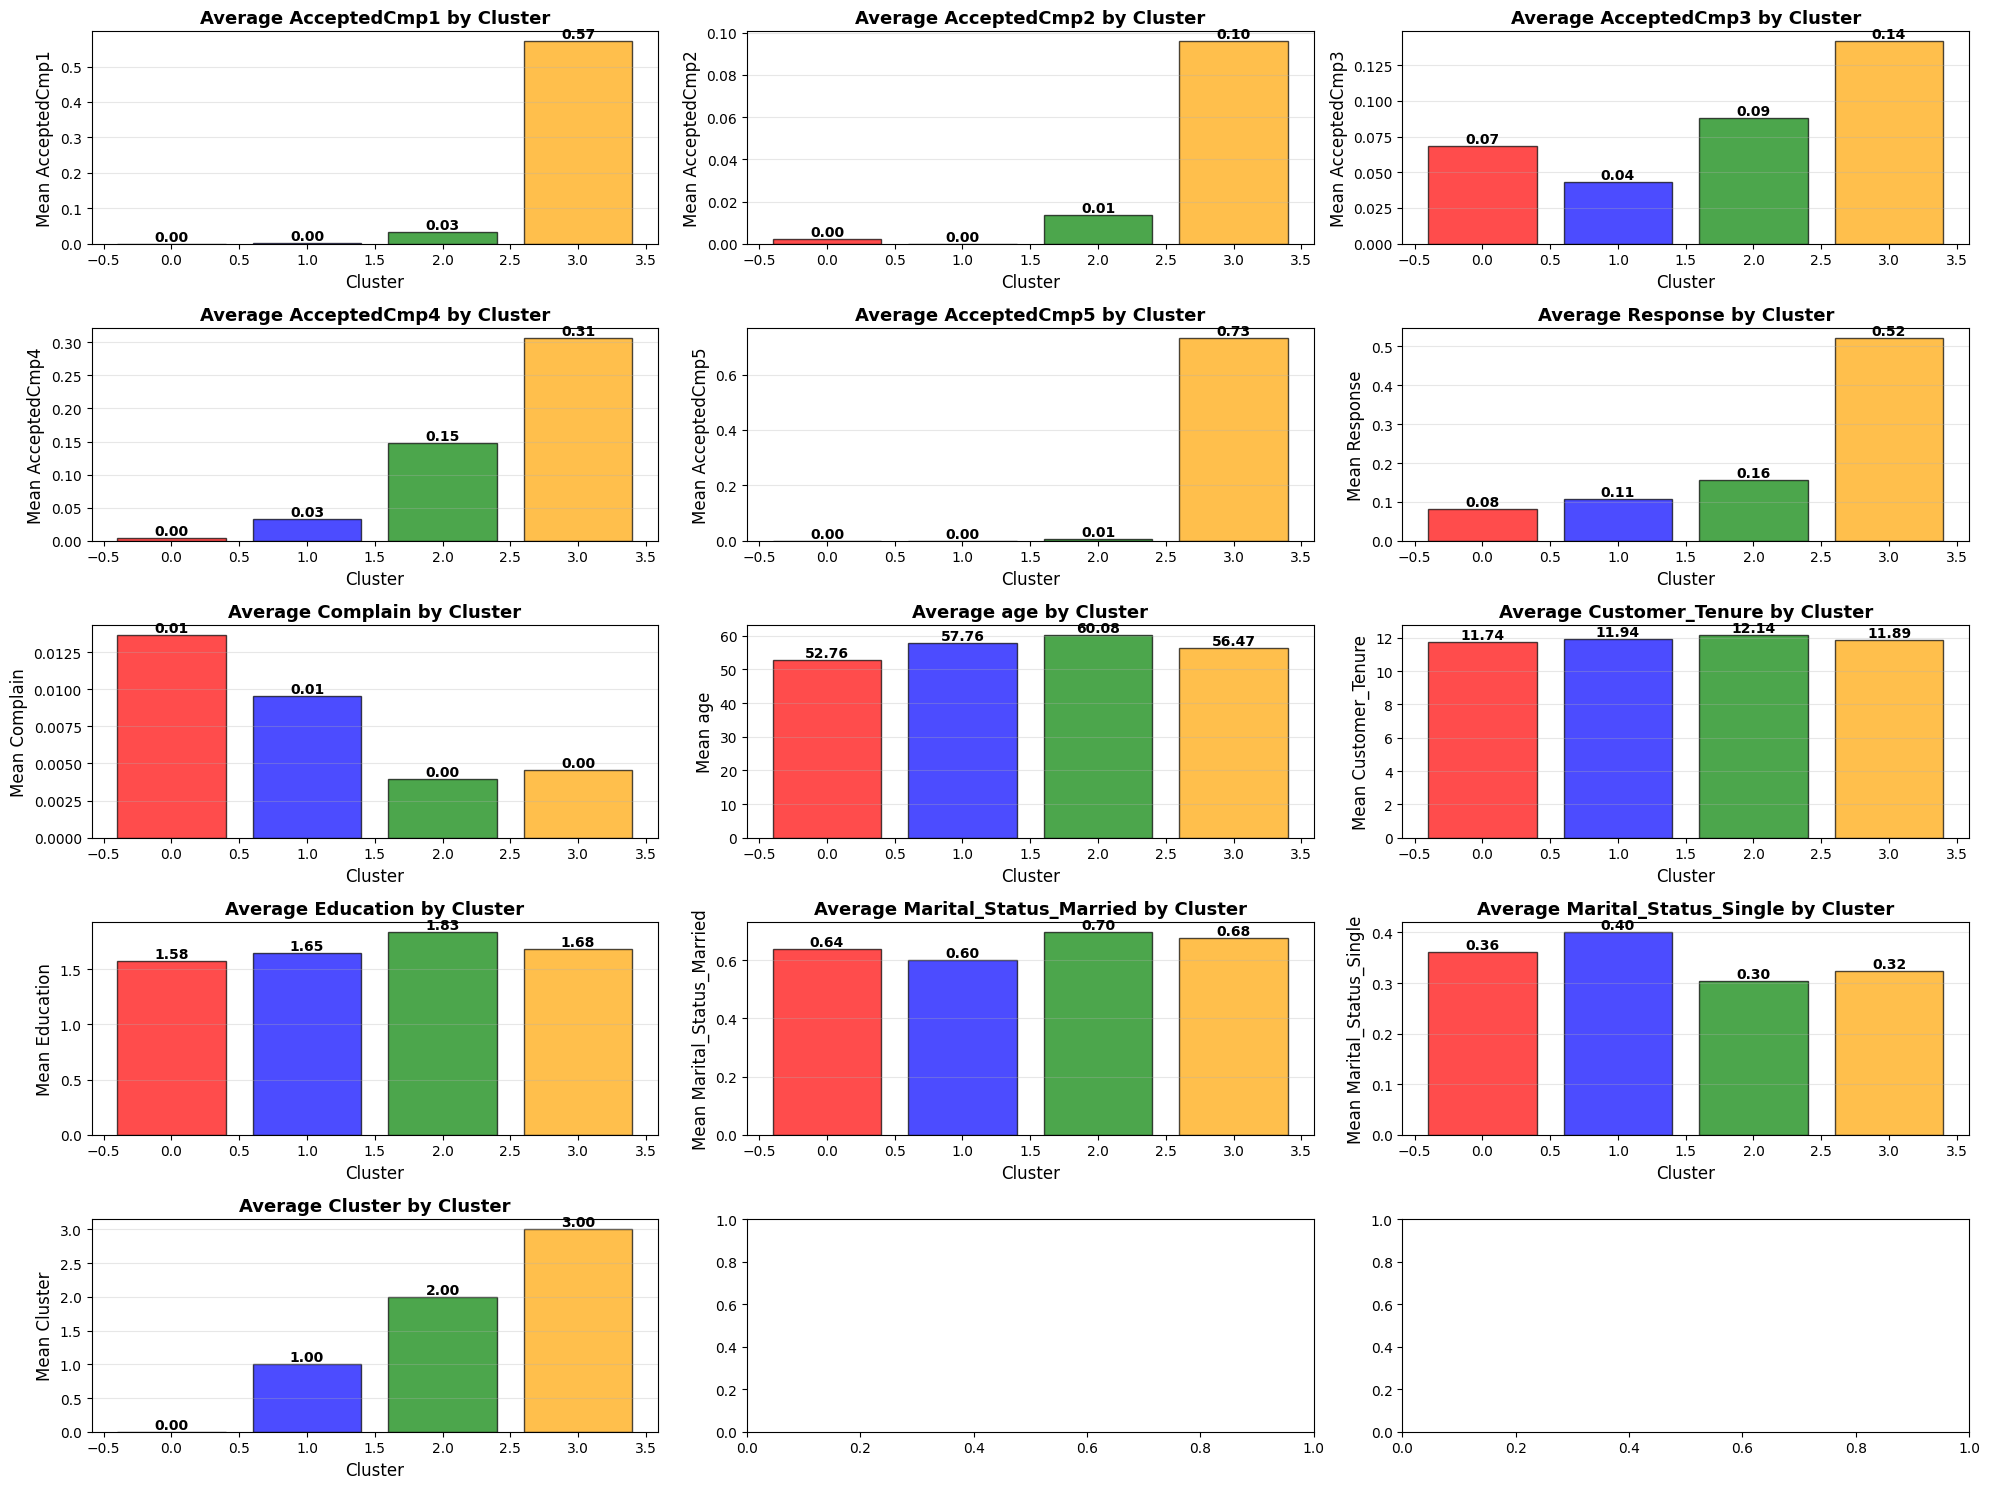

In [116]:
# Visualisasi profil cluster untuk fitur-fitur penting
fig, axes = plt.subplots(5, 3, figsize=(20, 15))
axes = axes.flatten()

# Pilih beberapa fitur penting untuk divisualisasikan
important_features = [
       'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4',
       'AcceptedCmp5', 'Response', 'Complain', 'age', 'Customer_Tenure',
       'Education', 'Marital_Status_Married', 'Marital_Status_Single',
       'Cluster']

for idx, feature in enumerate(important_features):
    cluster_means = df_run.groupby('Cluster')[feature].mean()
    axes[idx].bar(cluster_means.index, cluster_means.values, 
                  color=['red', 'blue', 'green', 'orange'], 
                  edgecolor='black', alpha=0.7)
    axes[idx].set_xlabel('Cluster', fontsize=12)
    axes[idx].set_ylabel(f'Mean {feature}', fontsize=12)
    axes[idx].set_title(f'Average {feature} by Cluster', fontsize=13, fontweight='bold')
    axes[idx].grid(True, alpha=0.3, axis='y')
    
    # Tambahkan nilai di atas bar
    for i, v in enumerate(cluster_means.values):
        axes[idx].text(i, v, f'{v:.2f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

# Simpulkan Analisa dari hasil

### Analisis Karakteristik Hasil Clustering Pelanggan (k = 4)

Penelitian ini bertujuan untuk melakukan **klasterisasi pelanggan (customer segmentation)** berdasarkan karakteristik demografis, perilaku pembelian, kanal transaksi, serta respons terhadap kampanye pemasaran. Berdasarkan evaluasi menggunakan **Elbow Method dan Silhouette Score**, jumlah cluster optimal yang digunakan dalam penelitian ini adalah **4 cluster (k = 4)**.

---

### 1. Tujuan Proyek Clustering

Proyek ini bertujuan untuk:
- Mengelompokkan pelanggan berdasarkan **kemiripan perilaku konsumsi dan karakteristik demografis**
- Mengidentifikasi **segmen pelanggan potensial**
- Menjadi dasar bagi perusahaan dalam menyusun:
  - Strategi promosi
  - Penentuan target kampanye
  - Personalisasi pemasaran

Metode yang digunakan adalah **K-Means Clustering** dengan jumlah maksimum cluster sebanyak **4 kelompok pelanggan**.

---

### 2. Ringkasan Umum Karakteristik Antar Cluster

Secara umum, keempat cluster menunjukkan perbedaan yang jelas pada aspek:
- **Tingkat pendapatan (Income)**
- **Total belanja produk (Mnt*)**
- **Frekuensi transaksi online, katalog, dan toko**
- **Respons terhadap kampanye pemasaran**
- **Karakteristik keluarga (Kidhome & Teenhome)**

Cluster juga menunjukkan perbedaan nyata dalam:
- Aktivitas digital
- Loyalitas pelanggan
- Sensitivitas terhadap promosi

---

### 3. Profil Detail Masing-Masing Cluster

---

#### 🔴 Cluster 0 – *Low Value Passive Customers*

**Karakteristik utama:**
- Rata-rata belanja:
  - MntWines ≈ 2.76  
  - MntFruits ≈ 1.13  
  - MntMeat ≈ 2.56  
  - MntFish ≈ 1.38  
  - MntSweet ≈ 1.15  
  - MntGold ≈ 2.14  
- Aktivitas pembelian:
  - Web purchase ≈ 1.79
  - Store purchase ≈ 2.94
  - Catalog purchase ≈ 0.42
- Aktivitas web bulanan tinggi (NumWebVisits ≈ 6.52) tetapi konversi rendah
- Respons kampanye sangat rendah:
  - Response ≈ 0.08
- Komplain relatif lebih tinggi dibanding cluster lain
- Memiliki **anak kecil (Kidhome ≈ 0.83)**

**Interpretasi:**
Cluster ini merupakan pelanggan dengan **nilai ekonomi rendah**, sering mengunjungi website namun **jarang melakukan pembelian**, serta **kurang responsif terhadap promosi**.

---

#### 🔵 Cluster 1 – *Moderate Online Shoppers*

**Karakteristik utama:**
- Belanja menengah:
  - MntWines ≈ 5.92  
  - MntFruits ≈ 3.68  
  - MntMeat ≈ 5.53  
  - MntFish ≈ 4.06  
  - MntSweet ≈ 3.62  
  - MntGold ≈ 3.87  
- Aktivitas pembelian:
  - Web purchase ≈ 5.28
  - Store purchase ≈ 8.47
- Respons kampanye masih rendah:
  - Response ≈ 0.11
- Mayoritas sudah menikah
- Pendidikan relatif lebih tinggi dari Cluster 0

**Interpretasi:**
Cluster ini adalah pelanggan **kelas menengah**, cukup aktif berbelanja secara online dan offline, namun **belum terlalu responsif terhadap kampanye pemasaran**.

---

#### 🟢 Cluster 2 – *Family-Oriented Active Buyers*

**Karakteristik utama:**
- Memiliki **Teenhome paling tinggi (≈ 0.92)**
- Aktivitas pembelian tinggi:
  - Web purchase ≈ 5.98
  - Store purchase ≈ 6.34
- Paling sering melakukan pembelian dengan promo (NumDeals ≈ 4.20)
- Belanja produk sedang:
  - MntMeat ≈ 4.29
- Respons kampanye menengah:
  - Response ≈ 0.16
- Rata-rata usia tertinggi (≈ 60 tahun)
- Customer tenure paling lama

**Interpretasi:**
Cluster ini merupakan pelanggan **keluarga mapan**, aktif bertransaksi, sensitif terhadap promo, serta memiliki loyalitas yang relatif tinggi.

---

#### 🟡 Cluster 3 – *High Value & Highly Responsive Customers*

**Karakteristik utama:**
- Belanja tertinggi di hampir semua produk:
  - MntWines ≈ 6.59  
  - MntFruits ≈ 3.57  
  - MntMeat ≈ 5.98  
  - MntFish ≈ 4.00  
  - MntSweet ≈ 3.74  
  - MntGold ≈ 3.96  
- Aktivitas transaksi tertinggi:
  - Store purchase ≈ 8.29
  - Catalog purchase ≈ 6.13
- Respons kampanye **sangat tinggi**:
  - AcceptedCmp1 ≈ 0.57  
  - AcceptedCmp2 ≈ 0.10  
  - AcceptedCmp3 ≈ 0.14  
  - AcceptedCmp4 ≈ 0.31  
  - AcceptedCmp5 ≈ 0.73  
  - Response ≈ 0.52  
- Komplain hampir nol
- Kidhome dan Teenhome sangat rendah

**Interpretasi:**
Cluster ini adalah **pelanggan bernilai tinggi (high value customers)**, sangat loyal, sangat responsif terhadap promosi, serta memiliki kontribusi pendapatan terbesar bagi perusahaan.

---

#### 4. Kesimpulan Akhir Proyek Clustering

Berdasarkan hasil K-Means Clustering dengan jumlah maksimum **4 cluster**, dapat disimpulkan bahwa:

1. **Cluster 0** → Pelanggan pasif bernilai rendah  
2. **Cluster 1** → Pelanggan kelas menengah dengan aktivitas belanja sedang  
3. **Cluster 2** → Pelanggan keluarga aktif dan sensitif terhadap promo  
4. **Cluster 3** → Pelanggan bernilai tinggi dan sangat responsif terhadap kampanye

---

#### 5. Kesimpulan Umum Penelitian

> Proyek ini merupakan proyek **klasterisasi pelanggan (customer segmentation)** dengan tujuan utama untuk mengelompokkan pelanggan ke dalam segmen yang homogen berdasarkan karakteristik demografis, perilaku belanja, serta respons terhadap kampanye pemasaran. Berdasarkan evaluasi jumlah cluster optimal, digunakan **maksimal 4 cluster (k = 4)** yang mampu merepresentasikan perbedaan perilaku pelanggan secara jelas dan mudah diinterpretasikan untuk strategi pemasaran lanjutan.

---
